In [1]:
import numpy as np
import pandas as pd

In [2]:
# with one col
pd.read_csv('/content/subs.csv')

,Subscribers gained
0,48
1,57
2,40
3,43
4,44
...,...
360,231
361,226
362,155
363,144


pd.read_csv() always brings the data in DataFrame format rather than series.

In [3]:
type(pd.read_csv('/content/subs.csv'))

pandas.core.frame.DataFrame

**Pre-made Error to notify a deprecation.**

In [4]:
pd.read_csv('/content/subs.csv', squeeze=True)
# squeeze as a parameter is deprecated in the later versions.

TypeError: read_csv() got an unexpected keyword argument 'squeeze'

In [5]:
subs = pd.read_csv('/content/subs.csv').squeeze()
# squeeze() is used to convert dataframe result to series format.
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

Name:, comes from the value column's 1st value.

In [6]:
vk = pd.read_csv('/content/kohli_ipl.csv', index_col="match_no").squeeze()
# index_col is used to declare a column of csv file as an index.
# squeeze() is used to convert dataframe result to series format.
vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [7]:
movies = pd.read_csv('/content/bollywood.csv', index_col="movie").squeeze()
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [8]:
# Series Methods

In [9]:
# 1. head and tail
# head = first five data by default  =5
# tail = last five data by default =5
vk.head()

match_no
1     1
2    23
3    13
4    12
5     1
Name: runs, dtype: int64

In [10]:
print(vk.head(3))
vk.head(10)

match_no
1     1
2    23
3    13
Name: runs, dtype: int64


match_no
1      1
2     23
3     13
4     12
5      1
6      9
7     34
8      0
9     21
10     3
Name: runs, dtype: int64

In [11]:
vk.tail(7)

match_no
209    58
210    30
211     0
212    20
213    73
214    25
215     7
Name: runs, dtype: int64

In [12]:
# 2. sample
movies.sample()
# by not specifying an argument just get one record at a time.

movie
Halla Bol    Ajay Devgn
Name: lead, dtype: object

In [13]:
# takes an optional argument for number of random rows you want.
print(movies.sample(5))

movie
October (2018 film)      Varun Dhawan
Santa Banta Pvt Ltd       Boman Irani
Don't Stop Dreaming      Rishi Kapoor
Company (film)             Ajay Devgn
Anwar (2007 film)      Nauheed Cyrusi
Name: lead, dtype: object


In [14]:
# 3. value_counts
# returns the frequency of a data item in a series, in descending order.
movies.value_counts()

lead
Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
                    ..
Diganth              1
Parveen Kaur         1
Seema Azmi           1
Akanksha Puri        1
Edwin Fernandes      1
Name: count, Length: 566, dtype: int64

In [15]:
# 4. sort_values: Takes two arguments, ascending and inplace
# By default sorting order is ascending order
# By default inplace (permanent changes) is false. (To make permanent changes,
# first copy the data into another variable to protect the original dataset.)
vk.sort_values()

match_no
87       0
211      0
207      0
206      0
91       0
      ... 
164    100
120    100
123    108
126    109
128    113
Name: runs, Length: 215, dtype: int64

In [16]:
# sort_values() takes an argument ascending through which we can sort in reverse order.
vk.sort_values(ascending=False)

match_no
128    113
126    109
123    108
164    100
120    100
      ... 
93       0
211      0
130      0
8        0
135      0
Name: runs, Length: 215, dtype: int64

In [17]:
# Challenge: Fetch the highest score only (using method chaining: output of one method becomes input for another)
highest_score_vk = vk.sort_values(ascending=False).head(1).values[0]

In [18]:
print("Highest score of virat kohli in IPL is: " + str(highest_score_vk))
print(type(highest_score_vk))

Highest score of virat kohli in IPL is: 113
<class 'numpy.int64'>


In [19]:
vk
# no permanent changes till not stored in a variable.
# or used argument inplace=True.

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

**Again ! Pre-defined Error** to show a concept that,
you should always copy a series into another variabel
before sorting values with inplace, because inplace make
permanent changes to the original series.

In [21]:
vk.sort_values(inplace=True)

ValueError: This Series is a view of some other array, to sort in-place you must create a copy

**SOLUTION**

In [22]:
vk_sorted = vk.sort_values() # Create a sorted copy
vk_sorted.sort_values(inplace=True)  # Now you can sort in-place

In [23]:
print(vk.head(10))
print(vk_sorted.head(10))

match_no
1      1
2     23
3     13
4     12
5      1
6      9
7     34
8      0
9     21
10     3
Name: runs, dtype: int64
match_no
87     0
211    0
207    0
206    0
91     0
93     0
8      0
130    0
135    0
204    1
Name: runs, dtype: int64


In [24]:
# sort_index
movies.sort_index()

movie
1920 (film)                   Rajniesh Duggall
1920: London                     Sharman Joshi
1920: The Evil Returns             Vicky Ahuja
1971 (2007 film)                Manoj Bajpayee
2 States (2014 film)              Arjun Kapoor
                                   ...        
Zindagi 50-50                      Veena Malik
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi Tere Naam           Mithun Chakraborty
Zokkomon                       Darsheel Safary
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Name: lead, Length: 1500, dtype: object

In [25]:
movies_sorted = movies.sort_index()
movies_sorted.sort_index(inplace=True)

In [26]:
print(movies.head(10))
print(movies_sorted.head(10))

movie
Uri: The Surgical Strike                       Vicky Kaushal
Battalion 609                                    Vicky Ahuja
The Accidental Prime Minister (film)             Anupam Kher
Why Cheat India                                Emraan Hashmi
Evening Shadows                             Mona Ambegaonkar
Soni (film)                             Geetika Vidya Ohlyan
Fraud Saiyaan                                   Arshad Warsi
Bombairiya                                      Radhika Apte
Manikarnika: The Queen of Jhansi              Kangana Ranaut
Thackeray (film)                         Nawazuddin Siddiqui
Name: lead, dtype: object
movie
1920 (film)               Rajniesh Duggall
1920: London                 Sharman Joshi
1920: The Evil Returns         Vicky Ahuja
1971 (2007 film)            Manoj Bajpayee
2 States (2014 film)          Arjun Kapoor
22 Yards                       Barun Sobti
3 A.M. (2014 film)           Salil Acharya
3 Deewarein               Naseeruddin Shah
3 Idiots

In [27]:
# descending order
movies.sort_index(ascending=False)

movie
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Zokkomon                       Darsheel Safary
Zindagi Tere Naam           Mithun Chakraborty
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi 50-50                      Veena Malik
                                   ...        
2 States (2014 film)              Arjun Kapoor
1971 (2007 film)                Manoj Bajpayee
1920: The Evil Returns             Vicky Ahuja
1920: London                     Sharman Joshi
1920 (film)                   Rajniesh Duggall
Name: lead, Length: 1500, dtype: object

**SERIES MATHS METHODS**

In [28]:
# count
# total no.of items inside a series (only non-missing values i.e nan)
# while size counts nan values also.
vk.count()

215

In [29]:
# sum and product
subs.sum()

49510

In [30]:
# means, median, mode, std, var
print(subs.mean()) # avg
print(vk.median()) # middle value in a data set when the values are arranged in ascending or descending order
print(movies.mode()) # most repeated value ___________
print(subs.std()) # std deviation sqroot--/(n-mean)^2/n
print(vk.var()) # variance, same as std but without sqroot.

135.64383561643837
24.0
0    Akshay Kumar
Name: lead, dtype: object
62.6750230372527
688.0024777222343


In [31]:
# min / max
print(vk.max())
print(subs.min())

113
33


In [32]:
# describe
# provides a summary of mathematical quantities of a particular dataset.
vk.describe()

count    215.000000
mean      30.855814
std       26.229801
min        0.000000
25%        9.000000
50%       24.000000
75%       48.000000
max      113.000000
Name: runs, dtype: float64

In [33]:
subs.describe()

count    365.000000
mean     135.643836
std       62.675023
min       33.000000
25%       88.000000
50%      123.000000
75%      177.000000
max      396.000000
Name: Subscribers gained, dtype: float64

In [77]:
# QuickNote: DataFrame = multiple series working together.
## Series Indexing
x = pd.Series([12,13,14,35,46,57,58,79,9])
print(x[3])
# Negative indexing won't work with default indexes, example: x[-1]

# Using string indexing
print(movies['Zindagi Na Milegi Dobara'])

print(movies[50])
# we are able to do this indexing even when we specified movie names (string)
# as index, because pandas.Series automatically always creates an index
# of integers to the length of data starting from 0.

# Negative indexing will work with Custom string indexes only.
print(movies[-10])
print(vk[-1]) # here, Custom index is of type integer, hence will give error.

35
Hrithik Roshan
Akshay Kumar
Dino Morea


KeyError: -1

In [78]:
# Slicing: fetching multiple items
vk[5:15+1]

match_no
6      9
7     34
8      0
9     21
10     3
11    10
12    38
13     3
14    11
15    50
16     2
Name: runs, dtype: int64

In [79]:
# slicing from bottom
vk[-10:] # from -10 to last

match_no
206     0
207     0
208     9
209    58
210    30
211     0
212    20
213    73
214    25
215     7
Name: runs, dtype: int64

In [80]:
movies[::2] # skips one value & moves to the next

movie
Uri: The Surgical Strike                   Vicky Kaushal
The Accidental Prime Minister (film)         Anupam Kher
Evening Shadows                         Mona Ambegaonkar
Fraud Saiyaan                               Arshad Warsi
Manikarnika: The Queen of Jhansi          Kangana Ranaut
                                              ...       
Raaz (2002 film)                              Dino Morea
Waisa Bhi Hota Hai Part II                  Arshad Warsi
Kaante                                  Amitabh Bachchan
Aankhen (2002 film)                     Amitabh Bachchan
Company (film)                                Ajay Devgn
Name: lead, Length: 750, dtype: object

In [81]:
# Fancy indexing: specifying particular records needed in a list
vk[[1,3,4,5]]

match_no
1     1
3    13
4    12
5     1
Name: runs, dtype: int64

In [82]:
# indexing using label. # Fancy indexing
movies[['Kaante', 'Waisa Bhi Hota Hai Part II']] # just like dictionary

movie
Kaante                        Amitabh Bachchan
Waisa Bhi Hota Hai Part II        Arshad Warsi
Name: lead, dtype: object

In [83]:
#Editing Series
# 1 using indexing
marks_series = pd.Series([67,57,89,100],index=['maths','english','science','hindi'])
marks_series[1]=100
print(marks_series)

maths       67
english    100
science     89
hindi      100
dtype: int64


In [84]:
# 2. If index is not present.
marks_series['python']=100
print(marks_series)
# appends the item to the end of series.

maths       67
english    100
science     89
hindi      100
python     100
dtype: int64


In [85]:
# 3. using slicing
marks_series[0:2] =0
print(marks_series)

maths        0
english      0
science     89
hindi      100
python     100
dtype: int64


In [86]:
marks_series
# python does not change because it's not part of the series permanently.

maths        0
english      0
science     89
hindi      100
python     100
dtype: int64

In [87]:
# Series with Python Functionalities

In [88]:
print(len(subs)) # total no.of records including nan values.
print(type(subs)) # type of object
print(dir(subs)) # returns list of functions & attributes accessible to the object passed inside dir()
print(sorted(subs)) # returns list format
print(min(subs))
print(max(subs))

365
<class 'pandas.core.series.Series'>
['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rma

In [89]:
# type conversion: data_type(object)
print(list(marks_series))
print(dict(marks_series))

[0, 0, 89, 100, 100]
{'maths': 0, 'english': 0, 'science': 89, 'hindi': 100, 'python': 100}


In [90]:
# membership: in or not in
# works on index values by default
print('Zindagi 50-50' in movies)
print('Zindagi 50-50' not in movies)

True
False


In [91]:
print('Akshay Kumar' in movies)

False


In [92]:
# Enable value based membership operation using '.values' attribute
print('Akshay Kumar' in movies.values)

True


In [93]:
# Looping
name = ['Naisarg', 'Nitish', 'Manisha', 'Aditya']
age = [23, 35, 24, 23]
students = pd.Series(age, index=name)
print("By default prints the values: here ages,")
for age in students:
    print(age)
print("We can specify to print indexes as well:")
for names in students.index:
    print(names)

By default prints the values: here ages,
23
35
24
23
We can specify to print indexes as well:
Naisarg
Nitish
Manisha
Aditya


In [94]:
# Arithmetic operators
# How many years are remaining for each student to reach age 50?
50 - students

Naisarg    27
Nitish     15
Manisha    26
Aditya     27
dtype: int64

In [95]:
# Relational operators: >,>=,<,<=,!,==,etc.
vk >= 50

match_no
1      False
2      False
3      False
4      False
5      False
       ...  
211    False
212    False
213     True
214    False
215    False
Name: runs, Length: 215, dtype: bool

In [96]:
# Boolean Indexing on Series
# Find no of 50's and 100's scored by kohli
print(vk[vk>=50].value_counts().sum())
print(vk[vk>=50].size)
print(vk[vk>=50].count())

50
50
50


In [97]:
# find number of ducks
vk[vk == 0].size

9

In [98]:
# Count number of day when I had more than 200 subs a day
subs[subs>200].count()

59

In [99]:
# find actors who have done more than 20 movies
num_movies = movies.value_counts() # how many time each value is repeating. here, name of actors.
print(num_movies) # holds the total value counts of actors repeating. Hence, done that no.of movies.
print(num_movies>20) # returns true false series
print(num_movies[num_movies>20]) # returns the actors who have done more than 20 movies.

lead
Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
                    ..
Diganth              1
Parveen Kaur         1
Seema Azmi           1
Akanksha Puri        1
Edwin Fernandes      1
Name: count, Length: 566, dtype: int64
lead
Akshay Kumar         True
Amitabh Bachchan     True
Ajay Devgn           True
Salman Khan          True
Sanjay Dutt          True
                    ...  
Diganth             False
Parveen Kaur        False
Seema Azmi          False
Akanksha Puri       False
Edwin Fernandes     False
Name: count, Length: 566, dtype: bool
lead
Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
Shah Rukh Khan      22
Emraan Hashmi       21
Name: count, dtype: int64


In [100]:
# Plotting Graphs on Series object

<Axes: >

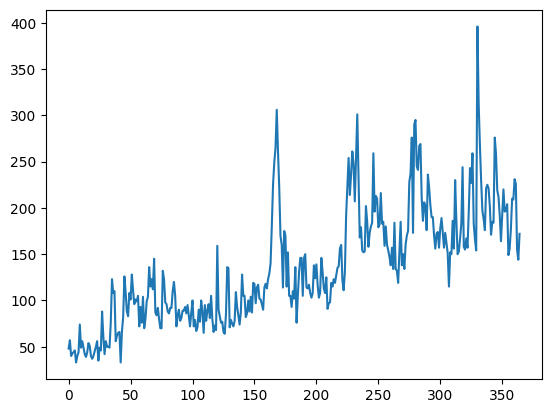

In [101]:
subs.plot() # where x = no.of days, y = no.of subscribers gained

<Axes: xlabel='lead'>

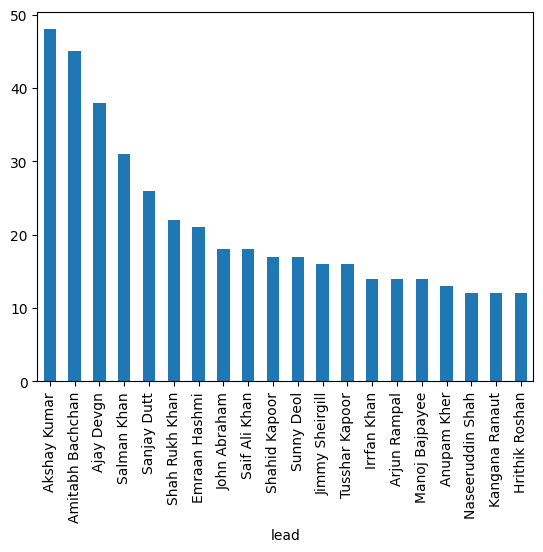

In [102]:
movies.value_counts().head(20).plot(kind='bar', x='Actors', y='No.of Movies')

In [103]:
vk.describe()

count    215.000000
mean      30.855814
std       26.229801
min        0.000000
25%        9.000000
50%       24.000000
75%       48.000000
max      113.000000
Name: runs, dtype: float64

In [103]:
# Some important Series Methods
# astype, between, clip, drop_duplicates, isnull
# dropna, fillna, isin, apply, copy.

In [124]:
# astype
# Changes the datatype
vk
import sys
print(sys.getsizeof(vk))


11752


In [129]:
print(sys.getsizeof(vk.astype('int32')))
print(sys.getsizeof(vk.astype('int16')))
# Since we know virat kohli's dataset has 113 as the maximum value,
# we can change the datatype of series to 'int8'
# which would save us some memory space.
print(sys.getsizeof(vk.astype('int8')))


10892
10462
10247


In [130]:
# between: lower-limit and higher-limit -> both are included
vk.between(51,99)

match_no
1      False
2      False
3      False
4      False
5      False
       ...  
211    False
212    False
213     True
214    False
215    False
Name: runs, Length: 215, dtype: bool

In [131]:
vk[vk.between(51,99)]

match_no
34     58
41     71
44     56
45     67
52     70
57     57
68     73
71     51
73     58
74     65
80     57
81     93
82     99
85     56
97     67
99     73
103    51
104    62
110    82
116    75
117    79
119    80
122    52
127    75
129    54
131    54
132    62
134    64
137    55
141    58
144    57
145    92
148    68
152    70
160    84
162    67
175    72
178    90
188    72
197    51
198    53
209    58
213    73
Name: runs, dtype: int64

In [133]:
print(vk[vk.between(51,99)].size)
print(vk[vk.between(51,99)].count())

43
43


In [134]:
# clip (a_min, a_max)
# values that are < a_min, are now a_min
# values that are > a_max, are now a_max
# the values between a_min and a_max are not affected
subs.clip(100,200)

0      100
1      100
2      100
3      100
4      100
      ... 
360    200
361    200
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [135]:
# drop_duplicates
temp = pd.Series([1,1,2,2,3,3,4,4])
temp

0    1
1    1
2    2
3    2
4    3
5    3
6    4
7    4
dtype: int64

In [136]:
temp.drop_duplicates()

0    1
2    2
4    3
6    4
dtype: int64

In [137]:
# we can keep the last occurance using keep argument and last value.
# by default, keep = 'first'
temp.drop_duplicates(keep='last')

1    1
3    2
5    3
7    4
dtype: int64

In [140]:
# Another example
movies
print(movies.size)

1500


In [142]:
print(movies.drop_duplicates().size)

566


In [143]:
# duplicated(): returns boolean series
# represents series with indexes that if repeated are True
# and if not repeated are False
temp

0    1
1    1
2    2
3    2
4    3
5    3
6    4
7    4
dtype: int64

In [144]:
temp.duplicated()

0    False
1     True
2    False
3     True
4    False
5     True
6    False
7     True
dtype: bool

In [146]:
# Trick: To count how many duplicated values are in a series
print(temp.duplicated().value_counts()) # counts both unique and duplicated values.
# or
print(temp.duplicated().sum()) # returns the total duplicated values only.

False    4
True     4
Name: count, dtype: int64
4


In [147]:
# isnull
temp2 = pd.Series([1,2,3,np.nan,5,6,np.nan,8,np.nan,10])
temp2

0     1.0
1     2.0
2     3.0
3     NaN
4     5.0
5     6.0
6     NaN
7     8.0
8     NaN
9    10.0
dtype: float64

In [156]:
print(temp2.size) # includes the nan values
print(temp2.count()) # excludes the nan values
print(temp2.value_counts()) # ignores that nan values.

10
7
1.0     1
2.0     1
3.0     1
5.0     1
6.0     1
8.0     1
10.0    1
Name: count, dtype: int64


In [161]:
# returns boolean series with values
# if null(nan), shows value = True
# and if not null (nan), shows value = False
print(temp2.isnull())

print(temp2.isnull().sum()) # returns the total nan values
print(temp2.notnull().sum()) # returns the total not nan values

# To get a clear overview of the dataset nan and not nan values
print(temp2.isnull().value_counts())

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8     True
9    False
dtype: bool
3
7
False    7
True     3
Name: count, dtype: int64


In [162]:
# dropna
# remove the missing(nan) values in one go.
# not permanent until stored.
# does not startover the index, keeps the original.
# converts to float.
temp2.dropna()

0     1.0
1     2.0
2     3.0
4     5.0
5     6.0
7     8.0
9    10.0
dtype: float64

In [165]:
# fillna
# replace the missing values in onego
temp2.fillna(10)

0     1.0
1     2.0
2     3.0
3    10.0
4     5.0
5     6.0
6    10.0
7     8.0
8    10.0
9    10.0
dtype: float64

In [167]:
print(temp2)
# You can also fill nan values using mathematical functions inside fillna()
print(temp2.fillna(temp2.mean())) # fills with average of the series data.Here,35(excludes nan)/7(excludes nan count)=5.

0     1.0
1     2.0
2     3.0
3     NaN
4     5.0
5     6.0
6     NaN
7     8.0
8     NaN
9    10.0
dtype: float64
0     1.0
1     2.0
2     3.0
3     5.0
4     5.0
5     6.0
6     5.0
7     8.0
8     5.0
9    10.0
dtype: float64


In [174]:
# isin
# to perform comparison operation with series data.
print(vk[(vk == 49) | (vk == 99)])
# but, it gets complex if we want to check for more conditions.
print(vk[vk.isin([49,99,69,79,0])])
# now, if we want a good overview, use the value_counts().
print(vk[vk.isin([49,99,69,79,0])].value_counts())

match_no
82    99
86    49
Name: runs, dtype: int64
match_no
8       0
82     99
86     49
87      0
91      0
93      0
117    79
130     0
135     0
206     0
207     0
211     0
Name: runs, dtype: int64
runs
0     9
99    1
49    1
79    1
Name: count, dtype: int64


In [175]:
# apply: Create custom functions
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [190]:
# We want actor's first name in uppercase only for each record.
print(movies.apply(lambda full_name: full_name.split()).head(5))
print("\nApplied changes to name of actor\n")
movies.apply(lambda full_name: full_name.split()[0].upper()).head(5)

movie
Uri: The Surgical Strike                   [Vicky, Kaushal]
Battalion 609                                [Vicky, Ahuja]
The Accidental Prime Minister (film)         [Anupam, Kher]
Why Cheat India                            [Emraan, Hashmi]
Evening Shadows                         [Mona, Ambegaonkar]
Name: lead, dtype: object

Applied changes to name of actor



movie
Uri: The Surgical Strike                 VICKY
Battalion 609                            VICKY
The Accidental Prime Minister (film)    ANUPAM
Why Cheat India                         EMRAAN
Evening Shadows                           MONA
Name: lead, dtype: object

In [191]:
# Another example
subs.head(10)

0    48
1    57
2    40
3    43
4    44
5    46
6    33
7    40
8    44
9    74
Name: Subscribers gained, dtype: int64

In [193]:
subs.mean().round()

136.0

In [196]:
# Task: we want to name good day and bad day according to rounded mean '>' or '<' for each day.
subs.apply(lambda sub_count:"Good Day" if sub_count>subs.mean().round() else "Bad Day").value_counts()

Subscribers gained
Bad Day     205
Good Day    160
Name: count, dtype: int64

In [ ]:
# copy()
# returns a copy of the series.
'''
NOTE: when using head() or tail(), we get the view of the original dataset.
So, If we store head() or tail() data into another series and apply operations
on that series, it will affect our original dataset.
So, inorder to avoid that, we use copy() method.
'''

In [199]:
experimental_dataset_vk = vk.head().copy()
experimental_dataset_vk

match_no
1     1
2    23
3    13
4    12
5     1
Name: runs, dtype: int64

In [200]:
# now, if we want to edit the first record
experimental_dataset_vk[1] = 100
experimental_dataset_vk

match_no
1    100
2     23
3     13
4     12
5      1
Name: runs, dtype: int64

In [202]:
# but, you can rest assured that, our original dataset will not get affected.
vk.head()

match_no
1     1
2    23
3    13
4    12
5     1
Name: runs, dtype: int64

In [203]:
#END OF SERIES

*PLEASE START HERE*

**Introduction to Pandas: Class SERIES**
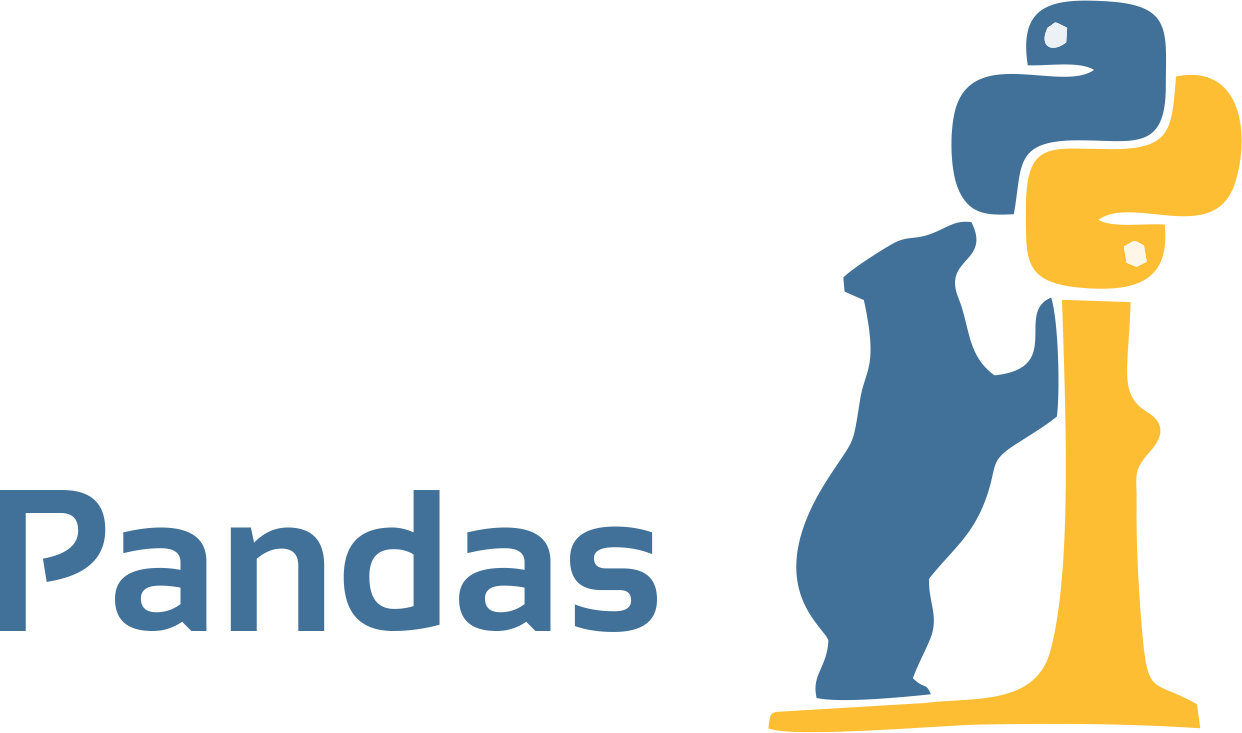







### What is Pandas

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

https://pandas.pydata.org/about/index.html

### Pandas Series

A Pandas Series is like a column in a table. It is a 1-D array holding data of any type.

### Importing Pandas

In [104]:
import numpy as np
import pandas as pd

### Series from lists

In [105]:
# string
country = ['India','Pakistan','USA','Nepal','Srilanka']

pd.Series(country)

0       India
1    Pakistan
2         USA
3       Nepal
4    Srilanka
dtype: object

In [106]:
# integers
runs = [13,24,56,78,100]

runs_ser = pd.Series(runs)
runs_ser

0     13
1     24
2     56
3     78
4    100
dtype: int64

In [107]:
# custom index
marks = [67,57,89,100]
subjects = ['maths','english','science','hindi']

pd.Series(marks,index=subjects)

maths       67
english     57
science     89
hindi      100
dtype: int64

In [108]:
pd.Series(marks,subjects) # by default the second argument is considered to be index.

maths       67
english     57
science     89
hindi      100
dtype: int64

In [109]:
# setting a name
marks = pd.Series(marks,index=subjects,name='Nitish ke marks')
marks

maths       67
english     57
science     89
hindi      100
Name: Nitish ke marks, dtype: int64

### Series from dict

In [110]:
marks = {
    'maths':67,
    'english':57,
    'science':89,
    'hindi':100
}

marks_series = pd.Series(marks,name='nitish ke marks')
marks_series

maths       67
english     57
science     89
hindi      100
Name: nitish ke marks, dtype: int64

### Series Attributes

In [111]:
# size
marks_series.size

4

In [112]:
# dtype
marks_series.dtype

dtype('int64')

In [113]:
# name
marks_series.name

'nitish ke marks'

In [114]:
# is_unique
marks_series.is_unique

pd.Series([1,1,2,3,4,5]).is_unique

False

In [115]:
# index
marks_series.index

Index(['maths', 'english', 'science', 'hindi'], dtype='object')

In [116]:
runs_ser.index

RangeIndex(start=0, stop=5, step=1)

In [117]:
# values
marks_series.values

array([ 67,  57,  89, 100])

In [118]:
marks_series.values[0]

67